In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   
import json # to read json file

C:\Users\sagarnil_dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
with open('amsterdam.json') as json_data:
    d = json.load(json_data)

In [172]:
ds_bedroom=pd.DataFrame.from_dict(d['bedrooms'],orient='index')
ds_bedroom.describe()
ds_bedroom.isnull().sum()

ds=pd.DataFrame.from_dict(d,orient='columns')
ds.isnull().sum()


host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [173]:
type(ds['bedrooms'])

pandas.core.series.Series

In [174]:
ds.price=ds.price.str.replace('$','')
ds.price=ds.price.str.replace(',','')

In [175]:
ds.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [176]:
ds.price=ds.price.astype('float64')

In [177]:
round(ds.price.mean(),3)
np.percentile(ds.price, 99)
ds=ds[ds.price<=440]
ds.dropna(how='any',inplace=True)

In [178]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [4.899431, 52.379189, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [179]:
ds['DistanceFromCC']=ds.apply(lambda row : haversine(row['longitude'],row['latitude']), axis = 1)

ds=ds.sort_values(by=['DistanceFromCC'])
second_booking_price=ds['price'][1]

ds_lessthan1kmcc=ds[ds.DistanceFromCC<=1]
ds_groupby_roomtype=ds_lessthan1kmcc.groupby(['room_type']).mean()


round(ds_groupby_roomtype[ds_groupby_roomtype.index=='Private room']['price'],1)

room_type
Private room    118.1
Name: price, dtype: float64

In [180]:
ds.shape

(14998, 14)

In [181]:
ds.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                             float64
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
DistanceFromCC                    float64
dtype: object

In [182]:
ds.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,DistanceFromCC
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.372316,2.880317,1.116215,1.390919,1.499333,2.885051,17.797440,2.904654,130.050273,52.365312,4.889033,2.998582
std,11.203593,1.298492,0.343442,0.839649,0.940643,7.252271,34.766613,8.836070,63.820328,0.015765,0.035010,1.610995
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513,0.115801
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355582,4.864839,1.948924
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364960,4.886370,2.841338
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374805,4.907953,3.577086
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,440.000000,52.426224,5.027689,11.842162


In [183]:
ds=pd.get_dummies(ds)

In [184]:
ds

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,DistanceFromCC,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,0.115801,0,1,0,1,0
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,0.140946,0,0,1,1,0
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,0.145468,1,0,0,1,0
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,0.199767,0,1,0,0,1
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,0.206638,0,1,0,1,0
1447,4.0,2,1.0,1.0,1,1,0,4,250.0,52.377927,4.897073,0.212781,0,1,0,1,0
3064,2.0,2,1.0,1.0,1,2,21,1,150.0,52.378273,4.896626,0.215779,1,0,0,0,1
1660,1.0,2,1.0,1.0,1,3,0,1,200.0,52.377718,4.897159,0.224711,1,0,0,1,0
1481,1.0,2,1.0,1.0,1,6,0,1,130.0,52.378475,4.896224,0.231548,1,0,0,0,1
1939,1.0,4,1.0,1.0,2,2,8,1,145.0,52.378837,4.895983,0.237135,1,0,0,0,1


In [185]:
X = ds.drop("price", axis=1)

In [186]:
X

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,DistanceFromCC,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
3158,1.0,2,1.5,1.0,1,1,0,1,52.378546,4.900775,0.115801,0,1,0,1,0
3168,1.0,4,1.0,1.0,1,1,0,1,52.378850,4.901433,0.140946,0,0,1,1,0
2639,1.0,4,1.0,1.0,2,3,27,1,52.379089,4.897293,0.145468,1,0,0,1,0
3010,4.0,2,1.0,1.0,1,1,4,4,52.378549,4.896679,0.199767,0,1,0,0,1
1860,1.0,2,1.0,1.0,1,1,9,1,52.378398,4.896674,0.206638,0,1,0,1,0
1447,4.0,2,1.0,1.0,1,1,0,4,52.377927,4.897073,0.212781,0,1,0,1,0
3064,2.0,2,1.0,1.0,1,2,21,1,52.378273,4.896626,0.215779,1,0,0,0,1
1660,1.0,2,1.0,1.0,1,3,0,1,52.377718,4.897159,0.224711,1,0,0,1,0
1481,1.0,2,1.0,1.0,1,6,0,1,52.378475,4.896224,0.231548,1,0,0,0,1
1939,1.0,4,1.0,1.0,2,2,8,1,52.378837,4.895983,0.237135,1,0,0,0,1


In [187]:
y = ds.loc[:, 'price'].values
y

array([ 85.,  41., 159., ...,  50.,  50.,  83.])

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 200)



In [189]:
round(X_train.accommodates.mean()-X_test.accommodates.mean(),3)


-0.048

500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


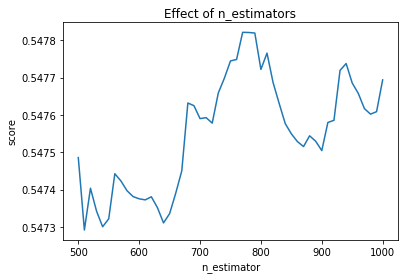

In [212]:
from sklearn.ensemble import RandomForestRegressor
estimators = np.arange(500, 1001, 10)
scores = []
for n in estimators:
    regressor = RandomForestRegressor(n_estimators = n, random_state = 200,oob_score=True, max_features='sqrt')
    regressor.fit(X_train, y_train)
    regressor.score(X_test,y_test)
    print(n)
    scores.append(regressor.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [215]:
[estimators],[scores]

([array([ 500,  510,  520,  530,  540,  550,  560,  570,  580,  590,  600,
          610,  620,  630,  640,  650,  660,  670,  680,  690,  700,  710,
          720,  730,  740,  750,  760,  770,  780,  790,  800,  810,  820,
          830,  840,  850,  860,  870,  880,  890,  900,  910,  920,  930,
          940,  950,  960,  970,  980,  990, 1000])],
 [[0.5474858348429206,
   0.5472919916585709,
   0.5474038239106399,
   0.5473424957395779,
   0.5473006560562318,
   0.5473220346171628,
   0.5474426255478864,
   0.5474233499934757,
   0.5473972274063824,
   0.5473814821749123,
   0.54737548106873,
   0.5473726470088656,
   0.5473809181300318,
   0.5473518982469439,
   0.5473110532325773,
   0.5473357338513216,
   0.547390069668879,
   0.5474502577715579,
   0.5476319239825742,
   0.5476247281898472,
   0.5475901020142917,
   0.5475927391969997,
   0.547578101689469,
   0.547658740433336,
   0.5476983885786175,
   0.5477445430984678,
   0.5477483964583273,
   0.5478210597377267,
   0.54

In [216]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 200,oob_score=True, max_features='sqrt')
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)


In [222]:
print(dict(zip(y_pred,y_test)))

{151.594: 265.0, 108.942: 125.0, 106.156: 82.0, 123.916: 129.0, 98.288: 85.0, 124.518: 150.0, 148.444: 145.0, 69.564: 60.0, 117.33: 99.0, 122.952: 150.0, 151.776: 136.0, 107.058: 99.0, 135.604: 120.0, 173.098: 149.0, 209.26: 160.0, 107.442: 75.0, 120.634: 149.0, 135.926: 157.0, 132.158: 88.0, 79.522: 150.0, 122.882: 97.0, 141.988: 150.0, 176.924: 349.0, 157.496: 199.0, 128.462: 125.0, 123.842: 85.0, 126.338: 95.0, 105.464: 90.0, 156.978: 129.0, 126.142: 125.0, 248.914: 250.0, 119.518: 119.0, 100.138: 100.0, 118.364: 99.0, 123.936: 163.0, 188.578: 360.0, 106.332: 100.0, 41.204: 25.0, 258.656: 270.0, 94.748: 89.0, 105.964: 137.0, 94.946: 74.0, 143.41: 209.0, 128.624: 129.0, 116.638: 100.0, 119.894: 120.0, 180.434: 130.0, 135.706: 147.0, 90.074: 79.0, 192.9: 152.0, 98.424: 100.0, 206.494: 175.0, 167.732: 290.0, 116.924: 95.0, 103.084: 120.0, 190.938: 200.0, 64.79: 120.0, 111.694: 150.0, 129.368: 89.0, 201.616: 200.0, 110.398: 95.0, 82.72: 70.0, 85.33: 60.0, 68.418: 50.0, 265.974: 320.0, 1